## Exercise 2

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline



In [2]:


df = sns.load_dataset('iris')
X = df.drop(columns=['species'])                        # Only X variables.
Y = df['species']                                       # Only Y variable.
header_X = X.columns                                    # Store the column names of X.
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
kmeans = KMeans(n_clusters=3, random_state=123)         # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X)                                           # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)                         # Cluster labeling result as Series.


In [4]:


# Frequency table of the observations labeled as '0'.
# This cluster has the majority 'virginica'.
case0 = Y[res==0]
print(case0.value_counts())



virginica     36
versicolor     2
Name: species, dtype: int64


## Exercise 5.3

In [5]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline



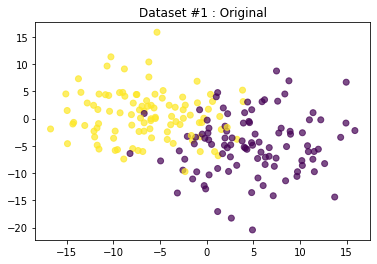

In [8]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()


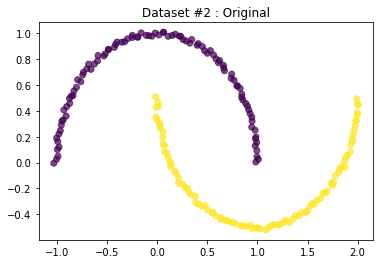

In [14]:
# Dataset #2.
# this make_moons will change the shape of to the moon
# Decrese the value of the noise will make nice looking moon
X2, label2 = make_moons(n_samples=200, noise=0.011, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()


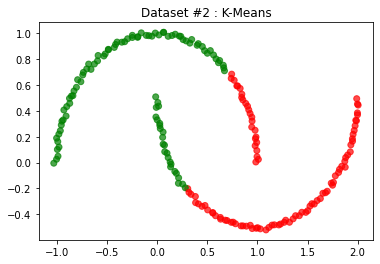

In [15]:


# Dataset #2 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X2)                                                 # Unsupervised learning => Only X1.    
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()



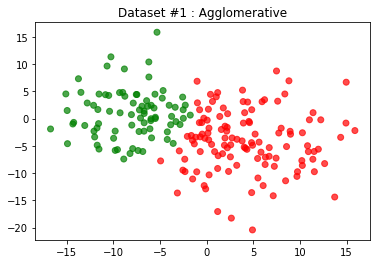

In [16]:


# Dataset #1 and two clusters.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()



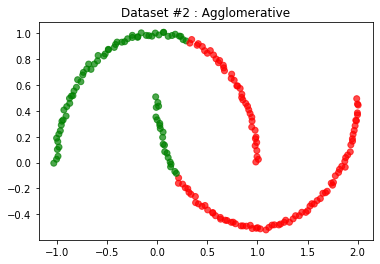

In [17]:
# Dataset #2 and two clusters.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

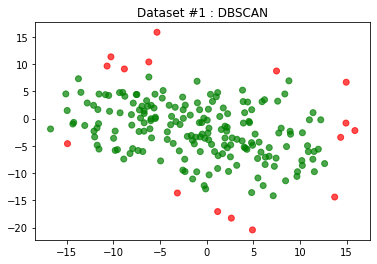

In [18]:
# Dataset #1.
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1.  Red = -1 = outlier.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

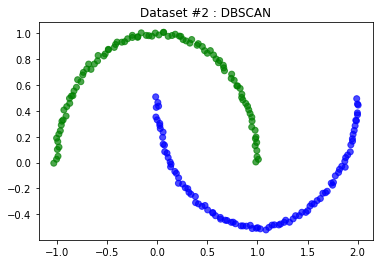

In [19]:


# Dataset #2.
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()



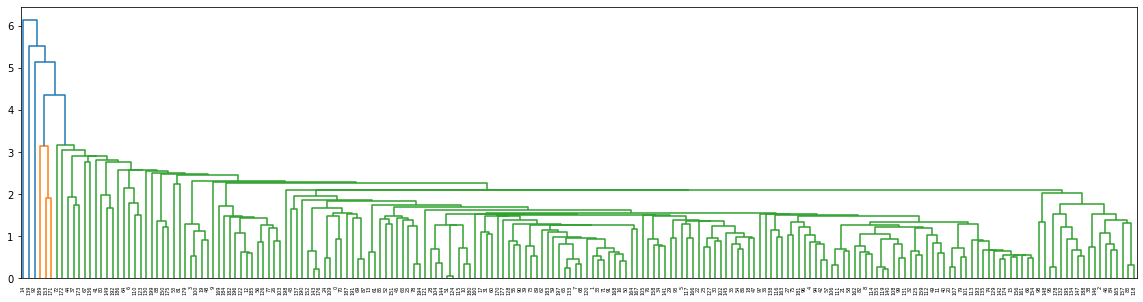

In [20]:


# Dataset #1 and show dendrogram.
myLinkage = linkage(X1,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()



In [21]:


# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()



1    197
2      1
3      1
4      1
dtype: int64

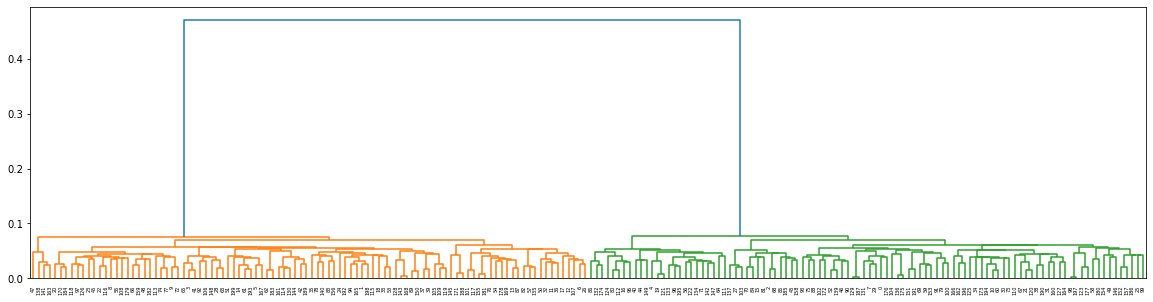

In [22]:


# Dataset #2 and show dendrogram.
myLinkage = linkage(X2,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()



In [23]:


# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()



1    100
2    100
dtype: int64

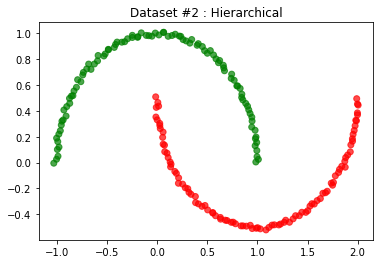

In [24]:


myColors = {1:'red',2:'green'}                                                # Define a color palette: 1~2.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

